# Workflow

1. 문제 정의
2. 데이터 수집 및 확인
3. 데이터 정제, 변환 및 통합
4. 데이터 분석 및 패턴 특정
5. 데이터 모델링 및 예측, 문제 해결
6. 데이터 시각화 및 리포트 작성, 최종결론

## 1. 문제정의

### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

=> killing 1502 out of 2224 passengers and crew  
=> not enough lifeboats for the passengers and crew  
=> some groups of people were more likely to survive than others, such as women, children, and the upper-class  
=> complete the analysis of what sorts of people were likely to survive  
=> which passengers survived the tragedy  

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not.   
For each in the test set, you must predict a 0 or 1 value for the variable.  

In [525]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd
import scipy as sp

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [526]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [647]:
actual_survivors_rate = round((2224-1502)/2224*100,2)
actual_survivors_rate

32.46

## 2. 데이터 수집 및 확인

- survival: 0 = No, 1 = Yes  
- pclass  : 1 = 1st, 2 = 2nd, 3 = 3rd  
- embarked: C = Cherbourg(셰르부르, 프랑스), Q = Queenstown(퀸즈타운(코브), 영국), S = Southampton(사우스햄프턴, 영국)  

In [527]:
train   = pd.read_csv('./data/train.csv')
test    = pd.read_csv('./data/test.csv')
combine = [train, test]

In [528]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [529]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [530]:
train.shape, len(train.columns), train.columns

((891, 12),
 12,
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [531]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [532]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [533]:
test.shape, len(test.columns), test.columns

((418, 11),
 11,
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [534]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [535]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [536]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [537]:
# train['Ticket'].unique()

In [538]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [539]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## 3. 데이터 정제, 변환 및 통합


In [540]:
# Cabin 컬럼 정제: 0 = NO, 1 = YES
def tf(x):
    if pd.isna(x):
        x=0
    else:
        x=1
    return x
train['Cabin'] = train['Cabin'].apply(lambda x:tf(x))

In [541]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [542]:
# Ticket, PassengerId 컬럼 제거
del train['Ticket']
del train['PassengerId']

In [543]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [544]:
# Age 컬럼 결측치 보정
# 891-714 = 177 명의 나이 미상 존재

In [545]:
# Embarked 컬럼 결측치 보정
a = 0 
for n in train['Embarked']:
    if pd.isna(n):
            print(a)
    a+=1

61
829


In [546]:
# 두명의 탑승 항구 확인 불가
train.iloc[61], train.iloc[829]

(Survived                      1
 Pclass                        1
 Name        Icard, Miss. Amelie
 Sex                      female
 Age                          38
 SibSp                         0
 Parch                         0
 Fare                         80
 Cabin                         1
 Embarked                    NaN
 Name: 61, dtype: object, Survived                                            1
 Pclass                                              1
 Name        Stone, Mrs. George Nelson (Martha Evelyn)
 Sex                                            female
 Age                                                62
 SibSp                                               0
 Parch                                               0
 Fare                                               80
 Cabin                                               1
 Embarked                                          NaN
 Name: 829, dtype: object)

In [547]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


In [548]:
# 의미 없는 Name 컬럼 대신 Name에서 Title을 추출후 Title 행 추가
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [549]:
del train['Name']

In [550]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,0,S,Mr
1,1,1,female,38.0,1,0,71.2833,1,C,Mrs
2,1,3,female,26.0,0,0,7.9250,0,S,Miss
3,1,1,female,35.0,1,0,53.1000,1,S,Mrs
4,0,3,male,35.0,0,0,8.0500,0,S,Mr


## 4. 데이터 분석 및 패턴 특정

In [551]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [552]:
train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
1,1,0.666667
0,0,0.299854


In [553]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [554]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [555]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [556]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [557]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [558]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).sum().sort_values(by='Survived', ascending=False)
# Miss, Mrs, Mr, Master + Rare

,Title,Survived
9,Miss,127
13,Mrs,99
12,Mr,81
8,Master,23
4,Dr,3
10,Mlle,2
14,Ms,1
11,Mme,1
16,Sir,1
1,Col,1


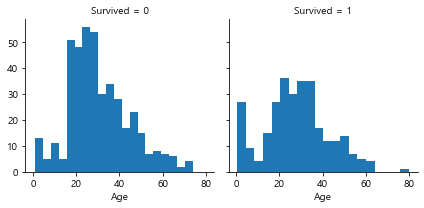

In [559]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()
# 어린아이들이 많이 살아남았다

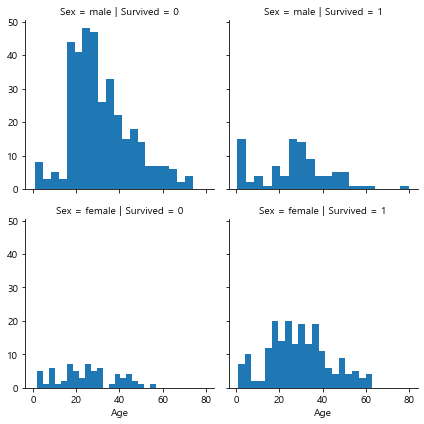

In [560]:
g = sns.FacetGrid(train, col='Survived', row='Sex')
g.map(plt.hist, 'Age', bins=20)
plt.show()
# 여성 생존자가 많다

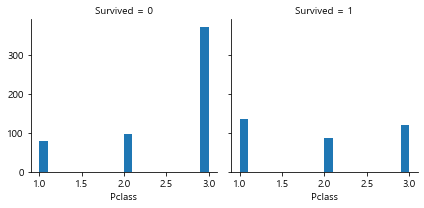

In [561]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)
plt.show()
# 각 class 별 생존 비율은 1등석 생존자들이 많다

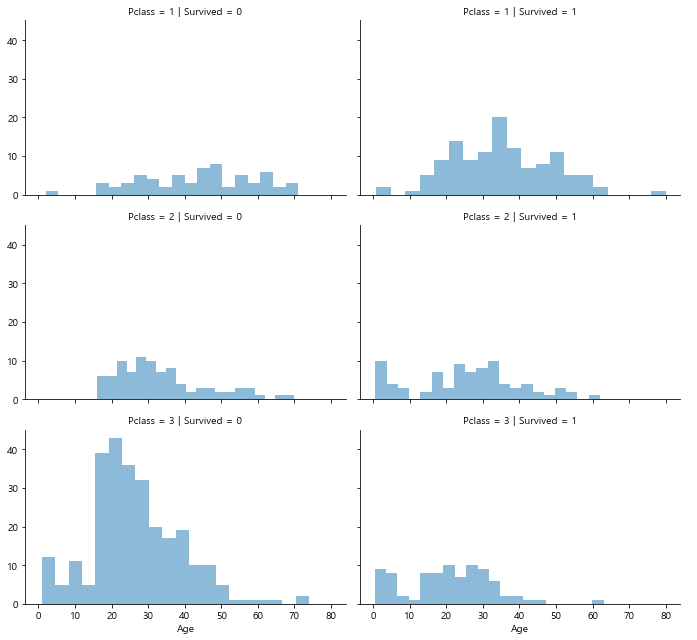

In [562]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
# 1등석은 생존율이 높은반면, 3등석은 사망률이 높다

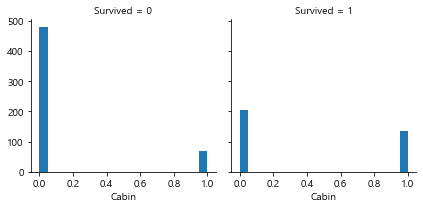

In [563]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Cabin', bins=20)
plt.show()
# Cablin의 생존율이 높음

In [564]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,0,S,Mr
1,1,1,female,38.0,1,0,71.2833,1,C,Mrs
2,1,3,female,26.0,0,0,7.9250,0,S,Miss
3,1,1,female,35.0,1,0,53.1000,1,S,Mrs
4,0,3,male,35.0,0,0,8.0500,0,S,Mr


In [565]:
# 0 = male, 1 = female
train['Sex'] = train['Sex'].map( {'female':1, 'male':0} ).astype(int)

In [566]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,S,Mr
1,1,1,1,38.0,1,0,71.2833,1,C,Mrs
2,1,3,1,26.0,0,0,7.9250,0,S,Miss
3,1,1,1,35.0,1,0,53.1000,1,S,Mrs
4,0,3,0,35.0,0,0,8.0500,0,S,Mr


In [567]:
# 0 = S, 1 = C, 2 = Q
freq_port = train.Embarked.dropna().mode()[0]
train['Embarked'] = train['Embarked'].fillna(freq_port)
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [568]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0,Mr
1,1,1,1,38.0,1,0,71.2833,1,1,Mrs
2,1,3,1,26.0,0,0,7.9250,0,0,Miss
3,1,1,1,35.0,1,0,53.1000,1,0,Mrs
4,0,3,0,35.0,0,0,8.0500,0,0,Mr


In [569]:
train['Title'] = train['Title'].replace([
    'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [570]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [571]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)

In [572]:
# 최종 데이터 형태
train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,3
2,1,3,1,26.0,0,0,7.9250,0,0,2
3,1,1,1,35.0,1,0,53.1000,1,0,3
4,0,3,0,35.0,0,0,8.0500,0,0,1
5,0,3,0,NaN,0,0,8.4583,0,2,1


In [573]:
# pd.cut(train['Age'],5)

In [574]:
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

In [575]:
train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0,1
1,1,1,1,2.0,1,0,71.2833,1,1,3
2,1,3,1,1.0,0,0,7.9250,0,0,2
3,1,1,1,2.0,1,0,53.1000,1,0,3
4,0,3,0,2.0,0,0,8.0500,0,0,1
5,0,3,0,NaN,0,0,8.4583,0,2,1


In [576]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

In [577]:
train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,0,0,0,1
1,1,1,1,2.0,1,0,3,1,1,3
2,1,3,1,1.0,0,0,1,0,0,2
3,1,1,1,2.0,1,0,3,1,0,3
4,0,3,0,2.0,0,0,1,0,0,1
5,0,3,0,NaN,0,0,1,0,2,1


In [578]:
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.0,0.550000
3,3.0,0.434783
2,2.0,0.404255
1,1.0,0.369942
4,4.0,0.090909


In [579]:
train = train.dropna(axis=0)

In [580]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,1.362745,0.512605,0.431373,1.599440,0.259104,0.260504,1.788515
std,0.491460,0.838250,0.481921,0.893367,0.929783,0.853289,1.088922,0.438450,0.521012,1.070493
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,4.000000,5.000000,6.000000,3.000000,1.000000,2.000000,5.000000


In [581]:
train = train.reset_index(drop=True)

In [582]:
train['sum']=train['SibSp']+train['Parch']

In [583]:
train['IsAlone'] = 0
train.loc[train['sum'] == 0, 'IsAlone'] = 1

In [584]:
del train['SibSp']
del train['Parch']
del train['sum']

In [585]:
train.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
709,0,3,1,2.0,2,0,2,3,0
710,0,2,0,1.0,1,0,0,5,1
711,1,1,1,1.0,2,1,0,2,1
712,1,1,0,1.0,2,1,1,1,1
713,0,3,0,1.0,0,0,2,1,1


### 테스트 데이터 전처리

In [586]:
# test['Fare'].value_counts

In [587]:
def tf(x):
    if pd.isna(x):
        x=0
    else:
        x=1
    return x
test['Cabin'] = test['Cabin'].apply(lambda x:tf(x))

In [598]:
del test['Ticket']
del test['PassengerId']
del test['Name']

In [589]:
test['Sex'] = test['Sex'].map( {'female':1, 'male':0} ).astype(int)

In [590]:
freq_port = train.Embarked.dropna().mode()[0]
test['Embarked'] = test['Embarked'].fillna(freq_port)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [591]:
test['Title'] = test['Title'].replace([
    'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [592]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
test['Title'] = test['Title'].map(title_mapping)

In [593]:
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4

In [594]:
# test.describe()
test = test.dropna(axis=0)

In [595]:
test = test.reset_index(drop=True)

In [596]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

In [600]:
test['sum']=test['SibSp']+test['Parch']
test['IsAlone'] = 0
test.loc[test['sum'] == 0, 'IsAlone'] = 1

In [601]:
del test['SibSp']
del test['Parch']
del test['sum']

In [602]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,3,0,2.0,0,0,2,1,1
1,3,1,2.0,0,0,0,3,0
2,2,0,3.0,1,0,2,1,1
3,3,0,1.0,1,0,0,1,1
4,3,1,1.0,1,0,0,3,0


In [603]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1.0,0,0,0,1,0
1,1,1,1,2.0,3,1,1,3,0
2,1,3,1,1.0,1,0,0,2,1
3,1,1,1,2.0,3,1,0,3,0
4,0,3,0,2.0,1,0,0,1,1


## 5. 데이터 모델링 및 예측, 문제 해결

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### 정확도 확인

- 각 알고리즘에 train 데이터의 70%를 활용하여 훈련
- train 데이터의 나머지 30%를 활용하여 정확도 확인

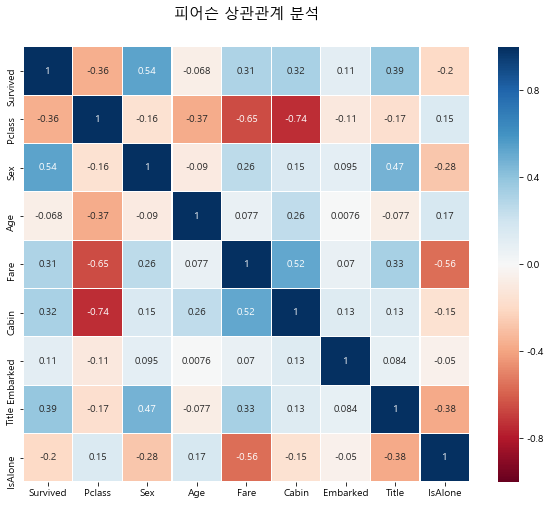

In [490]:
# corr() => 피어슨 상관관계 분석
# 0.1 ~ 0.3 약한 상관관계
# 0.3 ~ 0.7 뚜렷한 상관관계
# 0.7 ~ 1.0 강한 상관관계
plt.figure(figsize=(10,8))
plt.title('피어슨 상관관계 분석', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1, linecolor='white', annot=True, cmap='RdBu', vmax=1, vmin=-1)
plt.show()

In [491]:
X_train = train.loc[:len(train)*0.7].drop("Survived", axis=1) # 0~623
Y_train = train.loc[:len(train)*0.7]['Survived']
X_test  = train.loc[len(train)*0.7:].drop("Survived", axis=1)
Y_test  = train.loc[len(train)*0.7:]['Survived']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((500, 8), (500,), (214, 8), (214,))

In [606]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree_fit = decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
ml_accuracy = round(metrics.accuracy_score(Y_test, Y_pred)*100,2)
ml_score    = round(decision_tree.score(X_train, Y_train) * 100,2)
ml_accuracy, ml_score

(81.31, 87.8)

In [493]:
X_train['Sex'].value_counts()

0    312
1    188
Name: Sex, dtype: int64

In [494]:
Y_train.value_counts()

0    293
1    207
Name: Survived, dtype: int64

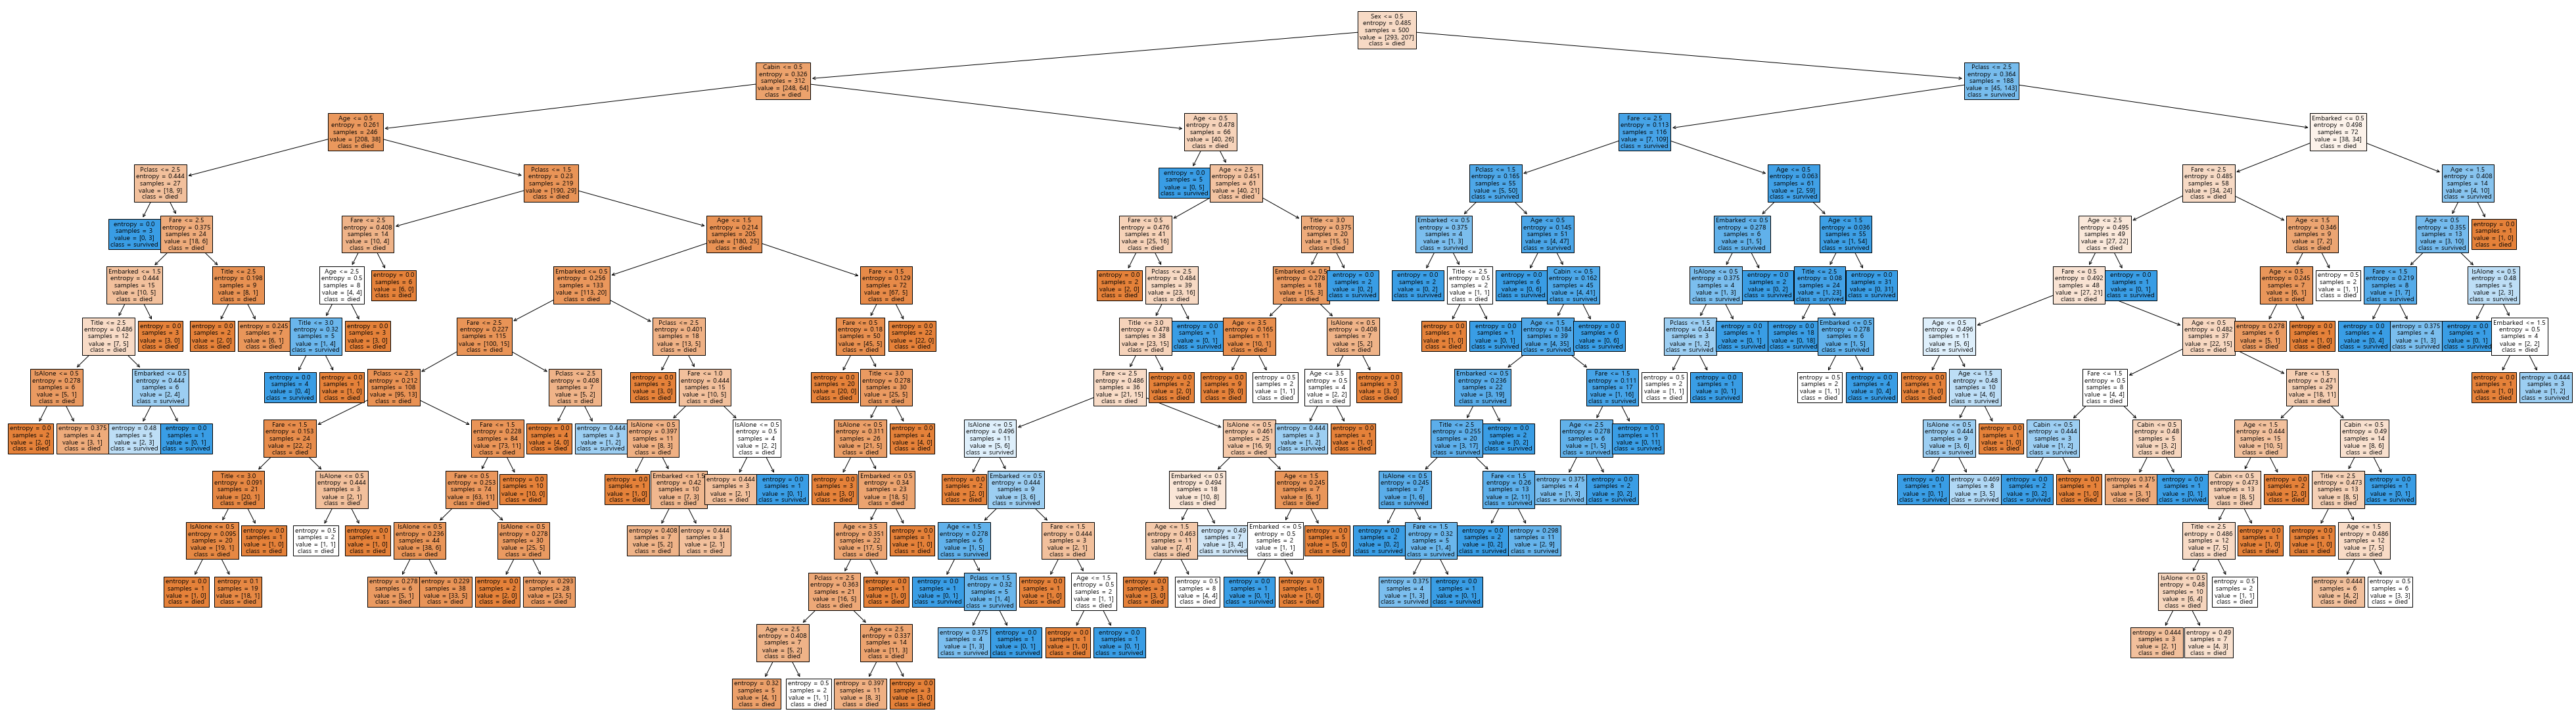

In [495]:
from sklearn.tree import plot_tree
plt.figure(figsize=(70,20))
plot_tree(decision_tree_fit, filled=True, fontsize=10, class_names=['died', 'survived'], feature_names=X_train.columns)
plt.show()

In [496]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
ml_accuracy = round(metrics.accuracy_score(Y_test, Y_pred)*100,2)
ml_score    = round(random_forest.score(X_train, Y_train) * 100,2)
ml_accuracy, ml_score

(82.71, 87.8)

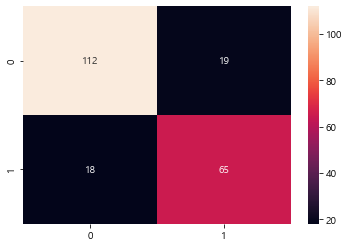

In [497]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred), )
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [719]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
ml_accuracy = round(metrics.accuracy_score(Y_test, Y_pred)*100,2)
ml_score    = round(knn.score(X_train, Y_train) * 100,2)
ml_accuracy, ml_score

(83.18, 85.0)

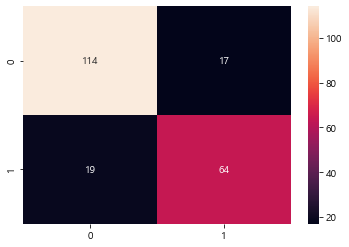

In [720]:
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred), )
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### test 데이터의 결과 예측

In [604]:
X_train_pre = train.drop("Survived", axis=1)
Y_train_pre = train['Survived']
X_test_pre  = test
X_train_pre.shape, Y_train_pre.shape, X_test_pre.shape

((714, 8), (714,), (331, 8))

In [737]:
# Decision Tree

decision_tree_pre = DecisionTreeClassifier()
decision_tree_pre.fit(X_train_pre, Y_train_pre)
Y_pred_pre = decision_tree_pre.predict(X_test_pre)
ml_score = round(decision_tree_pre.score(X_train_pre, Y_train_pre) * 100,2)
ml_score

88.1

In [738]:
pre_survivors_rate = round(pd.DataFrame(Y_pred_pre, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre)*100,2)
error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
print('Predicted survivors rate = %.2f %%' % pre_survivors_rate)
print('   Actual survivors rate = %.2f %%' % actual_survivors_rate)
print('              Error rate = 0%.2f %%' % error_rate)

Predicted survivors rate = 35.35 %
   Actual survivors rate = 32.46 %
              Error rate = 08.90 %


In [771]:
# Random Forest

random_forest_pre = RandomForestClassifier(n_estimators=200)
random_forest_pre.fit(X_train_pre, Y_train_pre)
Y_pred_pre = random_forest_pre.predict(X_test_pre)
ml_score = round(random_forest_pre.score(X_train_pre, Y_train_pre)*100,2)
ml_score

88.1

In [772]:
pre_survivors_rate = round(pd.DataFrame(Y_pred_pre, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre)*100,2)
error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
print('Predicted survivors rate = %.2f %%' % pre_survivors_rate)
print('   Actual survivors rate = %.2f %%' % actual_survivors_rate)
print('              Error rate = %.2f %%' % error_rate)

Predicted survivors rate = 37.16 %
   Actual survivors rate = 32.46 %
              Error rate = 14.48 %


In [882]:
# K-Nearest Neighbors

n_neighbors = list()
tmp = list()

for n in range(3,21):
    n_neighbors.append(n)
    knn_pre = KNeighborsClassifier(n_neighbors=n)
    knn_pre.fit(X_train_pre, Y_train_pre)
    Y_pred_pre = knn_pre.predict(X_test_pre)
    ml_score = round(knn_pre.score(X_train_pre, Y_train_pre) * 100,2)
    pre_survivors_rate = round(pd.DataFrame(Y_pred_pre, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre)*100,2)
    error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
    dic = {'ml_score':ml_score, 'error_rate':error_rate}
    tmp.append(dic)
knn_df = pd.DataFrame(tmp, index=n_neighbors)
knn_df
#max_df = knn_df.loc[knn_df['ml_score'] == knn_df['ml_score'].max(),:]
#min_df = knn_df.loc[knn_df['error_rate'] == knn_df['error_rate'].min(),:]
#pd.concat([max_df, min_df], sort=True)

,ml_score,error_rate
3,85.29,31.24
4,85.29,2.37
5,85.01,15.40
6,85.43,1.45
7,85.15,33.09
8,84.87,12.63
9,84.59,25.66
10,83.75,12.63
11,84.17,21.93
12,83.61,13.56


In [879]:
# K-Nearest Neighbors

knn_pre = KNeighborsClassifier(n_neighbors=6)
knn_pre.fit(X_train_pre, Y_train_pre)
Y_pred_pre = knn_pre.predict(X_test_pre)
ml_score    = round(knn_pre.score(X_train_pre, Y_train_pre) * 100,2)
ml_score

85.43

In [880]:
pre_survivors_rate = round(pd.DataFrame(Y_pred_pre, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre)*100,2)
error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
print('Predicted survivors rate = %.2f %%' % pre_survivors_rate)
print('   Actual survivors rate = %.2f %%' % actual_survivors_rate)
print('              Error rate = 0%.2f %%' % error_rate)

Predicted survivors rate = 32.93 %
   Actual survivors rate = 32.46 %
              Error rate = 01.45 %


### 탑승객이 모두 여자라면?

- 성별은 피어슨 상관관계 분석에서 생존과 가장큰 상관관계를 보임

In [812]:
# 성별이 모두 여성 => 'Sex' 컬럼 삭제
# Title이 성별을 암시 => 'Title' 컬럼 삭제
X_train_pre2 = train.drop(["Survived", 'Sex', 'Title'], axis=1)
Y_train_pre2 = train['Survived']
X_test_pre2  = test.drop(['Sex', 'Title'], axis=1)
X_train_pre2.shape, Y_train_pre2.shape, X_test_pre2.shape

((714, 6), (714,), (331, 6))

In [815]:
# Decision Tree

decision_tree_pre2 = DecisionTreeClassifier()
decision_tree_pre2.fit(X_train_pre2, Y_train_pre2)
Y_pred_pre2 = decision_tree_pre2.predict(X_test_pre2)
ml_score = round(decision_tree_pre2.score(X_train_pre2, Y_train_pre2) * 100,2)
ml_score

79.13

In [816]:
pre_survivors_rate = round(pd.DataFrame(Y_pred_pre2, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre2)*100,2)
error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
print('Predicted survivors rate = %.2f %%' % pre_survivors_rate)
print('   Actual survivors rate = %.2f %%' % actual_survivors_rate)
print('              Error rate = %.2f %%' % error_rate)

Predicted survivors rate = 38.37 %
   Actual survivors rate = 32.46 %
              Error rate = 18.21 %


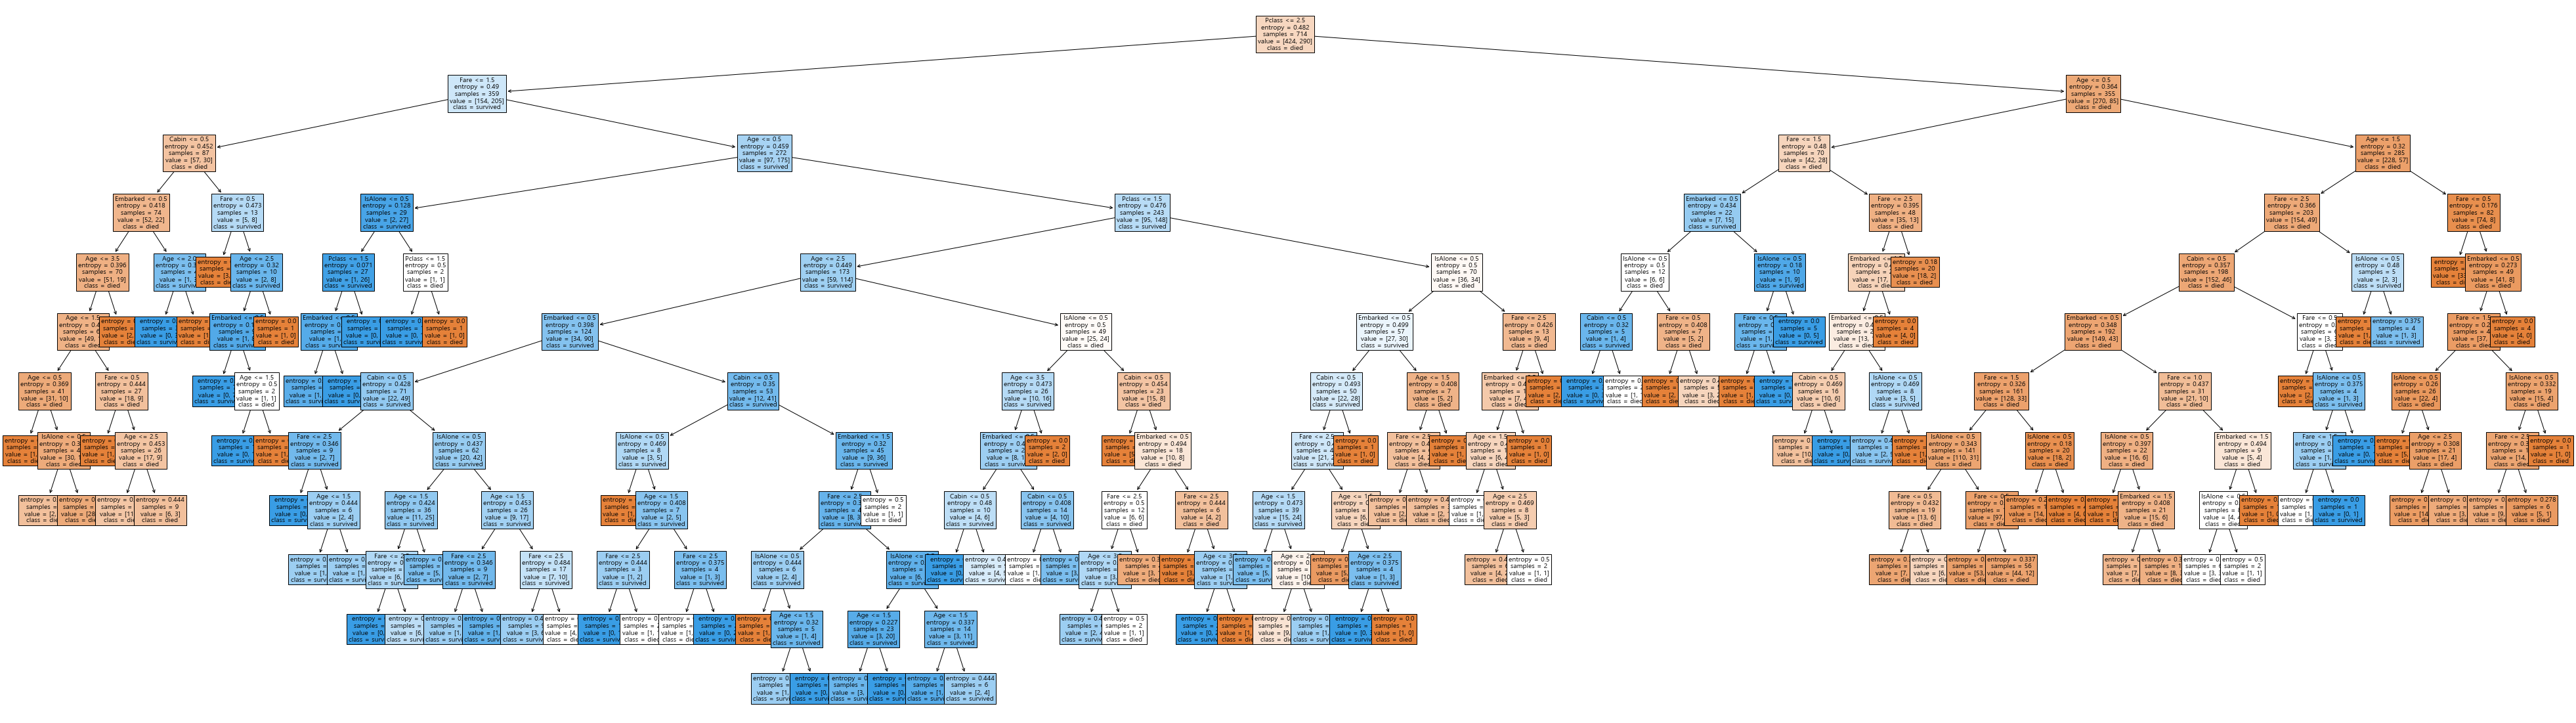

In [817]:
plt.figure(figsize=(70,20))
plot_tree(decision_tree_pre2.fit(X_train_pre2, Y_train_pre2), 
          filled=True, fontsize=10, class_names=['died', 'survived'], feature_names=X_train_pre2.columns)
plt.show()

In [824]:
# Random Forest

random_forest_pre2 = RandomForestClassifier(n_estimators=200)
random_forest_pre2.fit(X_train_pre2, Y_train_pre2)
Y_pred_pre2 = random_forest_pre2.predict(X_test_pre2)
ml_score = round(random_forest_pre2.score(X_train_pre2, Y_train_pre2)*100,2)
ml_score

79.13

In [825]:
pre_survivors_rate = round(pd.DataFrame(Y_pred_pre2, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre2)*100,2)
error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
print('Predicted survivors rate = %.2f %%' % pre_survivors_rate)
print('   Actual survivors rate = %.2f %%' % actual_survivors_rate)
print('              Error rate = %.2f %%' % error_rate)

Predicted survivors rate = 40.18 %
   Actual survivors rate = 32.46 %
              Error rate = 23.78 %


In [871]:
# K-Nearest Neighbors

n_neighbors = list()
tmp = list()

for n in range(3,21):
    n_neighbors.append(n)
    knn_pre2 = KNeighborsClassifier(n_neighbors=n)
    knn_pre2.fit(X_train_pre2, Y_train_pre2)
    Y_pred_pre2 = knn_pre2.predict(X_test_pre2)
    ml_score = round(knn_pre2.score(X_train_pre2, Y_train_pre2) * 100,2)
    pre_survivors_rate = round(pd.DataFrame(Y_pred_pre2, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre2)*100,2)
    error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
    dic = {'ml_score':ml_score, 'error_rate':error_rate}
    tmp.append(dic)
knn_df = pd.DataFrame(tmp, index=n_neighbors)
max_df = knn_df.loc[knn_df['ml_score'] == knn_df['ml_score'].max(),:]
min_df = knn_df.loc[knn_df['error_rate'] == knn_df['error_rate'].min(),:]
pd.concat([max_df, min_df], sort=True)

,error_rate,ml_score
8,21.93,76.61
9,27.51,76.61
16,7.98,72.97


In [872]:
knn_pre2 = KNeighborsClassifier(n_neighbors=16)
knn_pre2.fit(X_train_pre2, Y_train_pre2)
Y_pred_pre2 = knn_pre2.predict(X_test_pre2)
ml_score    = round(knn_pre2.score(X_train_pre2, Y_train_pre2) * 100,2)
ml_score

72.97

In [873]:
pre_survivors_rate = round(pd.DataFrame(Y_pred_pre2, columns=['Survived'])['Survived'].value_counts()[1]/len(X_test_pre2)*100,2)
error_rate = round( (pre_survivors_rate - actual_survivors_rate)/actual_survivors_rate * 100, 2)
print('Predicted survivors rate = %.2f %%' % pre_survivors_rate)
print('   Actual survivors rate = %.2f %%' % actual_survivors_rate)
print('              Error rate = %.2f %%' % error_rate)

Predicted survivors rate = 35.05 %
   Actual survivors rate = 32.46 %
              Error rate = 7.98 %
